In [1]:
import matplotlib.pyplot as plt
from models import CnnModel, CrnnLongModel, CrnnModel, RnnModel, MambaVisionModel, DinoModel
from train import main_train, validate_test, record_matrix
from Paras import Para
from data_loader import torch_dataset_loader
import torch
from kornia import augmentation as K
from kornia.augmentation import AugmentationSequential


2024-08-08 18:13:27.905957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 18:13:28.433739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:/usr/local/cuda-12.2/lib64
2024-08-08 18:13:28.433822: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64:/usr/local/cuda-12.2/lib64
2024-08-08 18:13:28.43

# Dino model
## Define Paras

In [2]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 50

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [3]:
Dino = DinoModel().to("cuda")

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
res = main_train(model=Dino, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='DinoModel.json',
                 save_name='DinoModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  70/280 batches | 272.89ms/ batch | CE: 2.3326 | Accuracy: 31.36% |
Epoch  1 | 140/280 batches | 270.37ms/ batch | CE: 1.8497 | Accuracy: 41.11% |
Epoch  1 | 210/280 batches | 270.18ms/ batch | CE: 1.6132 | Accuracy: 47.64% |
Epoch  1 | 280/280 batches | 270.09ms/ batch | CE: 1.4650 | Accuracy: 52.24% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 75.64s | CE: 1.4650 | Accuracy: 52.24% |
End of validation epoch   1 | time:  2.99s | CE: 0.9431 | Accuracy: 69.11% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches | 270.90ms/ batch | CE: 0.8159 | Accuracy: 71.86% |
Epoch  2 | 140/280 batches | 271.12ms/ batch | CE: 0.7772 | Accuracy: 74.11% 

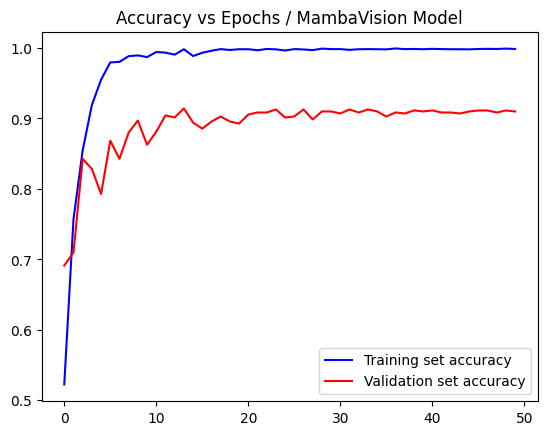

In [5]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / MambaVision Model')
plt.legend()
plt.show()

## Test Model

In [6]:
Para.MODEL_SAVE_FOlD = './'
Dino.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsDinoModel.pt'))
validate_test(model=Dino, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  2.88s | CE: 0.4452 | Accuracy: 88.11% |
---------------------------------------------------------------------------------------------------


(0.4452426791191101, 0.881127819548872)

In [7]:
Dino.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsDinoModel.pt'))
record_matrix(model=Dino, use_loader=test_loader, log_name='DinoMatrix.json')

End of Matrix Record, Save file in ./logsDinoMatrix.json
---------------------------------------------------------------------------------------------------


# MambaVision model
## Define Paras

In [8]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 70

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [9]:
MambaVision = MambaVisionModel().to("cuda")

## Train Model

In [10]:
res = main_train(model=MambaVision, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='MambaVisionModel.json',
                 save_name='MambaVisionModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  70/280 batches | 45.60ms/ batch | CE: 4.2791 | Accuracy: 15.29% |
Epoch  1 | 140/280 batches | 45.37ms/ batch | CE: 3.2621 | Accuracy: 21.43% |
Epoch  1 | 210/280 batches | 45.34ms/ batch | CE: 2.7958 | Accuracy: 25.83% |
Epoch  1 | 280/280 batches | 45.29ms/ batch | CE: 2.5211 | Accuracy: 29.70% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 12.70s | CE: 2.5211 | Accuracy: 29.70% |
End of validation epoch   1 | time:  0.51s | CE: 1.4391 | Accuracy: 53.35% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches | 45.70ms/ batch | CE: 1.5280 | Accuracy: 46.43% |
Epoch  2 | 140/280 batches | 45.52ms/ batch | CE: 1.4972 | Accuracy: 48.18% |
Epoc

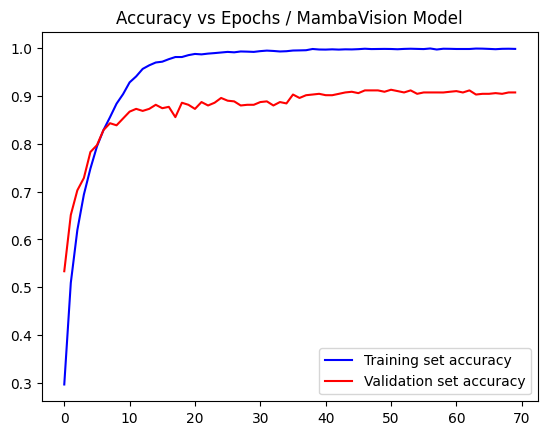

In [11]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / MambaVision Model')
plt.legend()
plt.show()

## Test Model

In [12]:
Para.MODEL_SAVE_FOlD = './'
MambaVision.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsMambaVisionModel.pt'))
validate_test(model=MambaVision, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.52s | CE: 0.5026 | Accuracy: 90.56% |
---------------------------------------------------------------------------------------------------


(0.5025582859109688, 0.9056390977443608)

In [13]:
MambaVision.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsMambaVisionModel.pt'))
record_matrix(model=MambaVision, use_loader=test_loader, log_name='MambaVisionMatrix.json')

End of Matrix Record, Save file in ./logsMambaVisionMatrix.json
---------------------------------------------------------------------------------------------------


# MambaVision model with augmantations
## Define Paras

In [2]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 70

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [3]:
## Augmantation list
aug_list = AugmentationSequential(
    K.RandomHorizontalFlip(p=0.05),
    K.RandomGaussianNoise(mean=0.0, std=0.1, p=0.2),
    K.RandomErasing(scale=(0.02, 0.2), ratio=(0.3, 3.0), p=0.1),
    K.RandomCrop(size=(128, 128), p=0.05),
    same_on_batch=False,
)

# Model intializing
MambaVisionAug = MambaVisionModel(aug_list).to("cuda")

## Train Model

In [4]:
res = main_train(model=MambaVisionAug, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='MambaVisionAugModel.json',
                 save_name='MambaVisionAugModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num
                 )

Epoch  1 |  70/280 batches | 59.27ms/ batch | CE: 4.1851 | Accuracy: 15.64% |
Epoch  1 | 140/280 batches | 54.48ms/ batch | CE: 3.2452 | Accuracy: 20.00% |
Epoch  1 | 210/280 batches | 53.01ms/ batch | CE: 2.8183 | Accuracy: 24.21% |
Epoch  1 | 280/280 batches | 52.23ms/ batch | CE: 2.5585 | Accuracy: 27.48% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 14.63s | CE: 2.5585 | Accuracy: 27.48% |
End of validation epoch   1 | time:  0.53s | CE: 1.3949 | Accuracy: 56.96% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches | 51.27ms/ batch | CE: 1.6243 | Accuracy: 44.57% |
Epoch  2 | 140/280 batches | 51.16ms/ batch | CE: 1.5993 | Accuracy: 44.93% |
Epoc

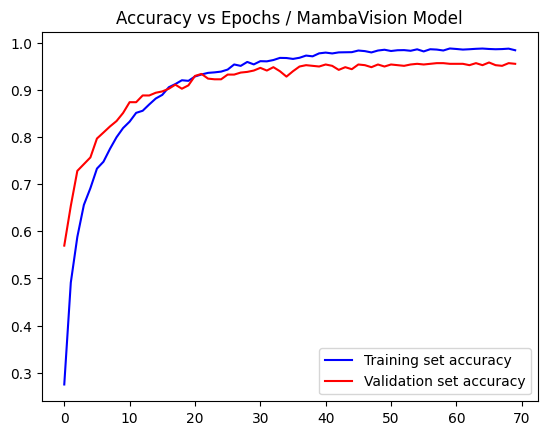

In [5]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / MambaVision Model')
plt.legend()
plt.show()

## Test Model

In [6]:
MambaVisionAug.cuda().load_state_dict(torch.load('modelsMambaVisionAugModel.pt'))
validate_test(model=MambaVisionAug, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.52s | CE: 0.1665 | Accuracy: 95.86% |
---------------------------------------------------------------------------------------------------


(0.16652082029868326, 0.9585714285714285)

In [7]:
MambaVisionAug.cuda().load_state_dict(torch.load( 'modelsMambaVisionAugModel.pt'))
record_matrix(model=MambaVisionAug, use_loader=test_loader, log_name='MambaVisionAugMatrix.json')

End of Matrix Record, Save file in ./logsMambaVisionAugMatrix.json
---------------------------------------------------------------------------------------------------


# CNN model
## Define Paras

In [2]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 50

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [3]:
CNN = CnnModel()

## Train Model

In [4]:
res = main_train(model=CNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='CnnModel.json',
                 save_name='CnnModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  70/280 batches | 18.06ms/ batch | CE: 2.2099 | Accuracy: 18.50% |
Epoch  1 | 140/280 batches | 13.51ms/ batch | CE: 2.1383 | Accuracy: 22.46% |
Epoch  1 | 210/280 batches | 11.99ms/ batch | CE: 2.1017 | Accuracy: 24.60% |
Epoch  1 | 280/280 batches | 11.29ms/ batch | CE: 2.0716 | Accuracy: 25.78% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time:  3.17s | CE: 2.0716 | Accuracy: 25.78% |
End of validation epoch   1 | time:  0.14s | CE: 1.9241 | Accuracy: 39.64% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches |  9.23ms/ batch | CE: 1.9441 | Accuracy: 31.29% |
Epoch  2 | 140/280 batches |  9.10ms/ batch | CE: 1.9089 | Accuracy: 33.43% |
Epoc

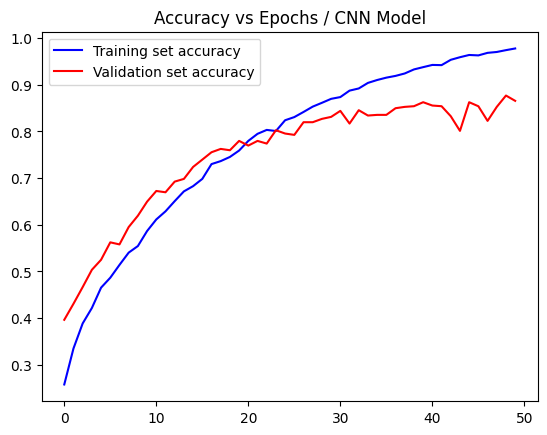

In [5]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CNN Model')
plt.legend()
plt.show()

## Test Model

In [6]:
CNN.cuda().load_state_dict(torch.load('modelsCnnModel.pt'))
validate_test(model=CNN, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.14s | CE: 0.4317 | Accuracy: 86.55% |
---------------------------------------------------------------------------------------------------


(0.4316699287721089, 0.8654887218045113)

In [8]:
CNN.cuda().load_state_dict(torch.load( 'modelsCnnModel.pt'))
record_matrix(model=CNN, use_loader=test_loader, log_name='CnnMatrix.json')

End of Matrix Record, Save file in ./logsCnnMatrix.json
---------------------------------------------------------------------------------------------------
